In [3]:
import pandas as pd
import os

# Ruta completa al archivo CSV
csv_path = '/Users/mariovelezcanizares/Documents/Proyecto Topic Modeling/NIPS Papers/papers.csv'

# Verificamos si el archivo existe
if not os.path.exists(csv_path):
    print("❌ El archivo CSV no se encuentra en la ruta especificada.")
else:
    # Leemos el archivo CSV
    papers = pd.read_csv(csv_path)
    print("✅ Archivo CSV leído correctamente.")
    print(papers.head())


✅ Archivo CSV leído correctamente.
     id  year                                              title event_type  \
0     1  1987  Self-Organization of Associative Database and ...        NaN   
1    10  1987  A Mean Field Theory of Layer IV of Visual Cort...        NaN   
2   100  1988  Storing Covariance by the Associative Long-Ter...        NaN   
3  1000  1994  Bayesian Query Construction for Neural Network...        NaN   
4  1001  1994  Neural Network Ensembles, Cross Validation, an...        NaN   

                                            pdf_name          abstract  \
0  1-self-organization-of-associative-database-an...  Abstract Missing   
1  10-a-mean-field-theory-of-layer-iv-of-visual-c...  Abstract Missing   
2  100-storing-covariance-by-the-associative-long...  Abstract Missing   
3  1000-bayesian-query-construction-for-neural-ne...  Abstract Missing   
4  1001-neural-network-ensembles-cross-validation...  Abstract Missing   

                                          pap

In [4]:
papers.head()

,id,year,title,event_type,pdf_name,abstract,paper_text
0,1,1987,Self-Organization of Associative Database and ...,NaN,1-self-organization-of-associative-database-an...,Abstract Missing,767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...
1,10,1987,A Mean Field Theory of Layer IV of Visual Cort...,NaN,10-a-mean-field-theory-of-layer-iv-of-visual-c...,Abstract Missing,683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...
2,100,1988,Storing Covariance by the Associative Long-Ter...,NaN,100-storing-covariance-by-the-associative-long...,Abstract Missing,394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...
3,1000,1994,Bayesian Query Construction for Neural Network...,NaN,1000-bayesian-query-construction-for-neural-ne...,Abstract Missing,Bayesian Query Construction for Neural\nNetwor...
4,1001,1994,"Neural Network Ensembles, Cross Validation, an...",NaN,1001-neural-network-ensembles-cross-validation...,Abstract Missing,"Neural Network Ensembles, Cross\nValidation, a..."


In [5]:
# Remove the columns
papers = papers.drop(columns=['id', 'event_type', 'pdf_name'], 
axis=1).sample(100)

# Print out the first rows of papers
papers.head()

,year,title,abstract,paper_text
3372,2010,Probabilistic Belief Revision with Structural ...,Experts (human or computer) are often required...,Probabilistic Belief Revision with Structural\...
4176,2012,Hierarchical spike coding of sound,We develop a probabilistic generative model fo...,To appear in: Neural Information Processing Sy...
5786,2016,Kernel Bayesian Inference with Posterior Regul...,We propose a vector-valued regression problem ...,Kernel Bayesian Inference with\nPosterior Regu...
2858,2008,On the Design of Loss Functions for Classifica...,The machine learning problem of classifier des...,On the Design of Loss Functions for Classifica...
430,1997,Approximating Posterior Distributions in Belie...,Abstract Missing,Approximating Posterior Distributions\nin Beli...


In [6]:
# Load the regular expression library
import re

# Remove punctuation
papers['paper_text_processed'] = \
papers['paper_text'].map(lambda x: re.sub('[,\.!?]', '', x))

# Convert the titles to lowercase
papers['paper_text_processed'] = \
papers['paper_text_processed'].map(lambda x: x.lower())

# Print out the first rows of papers
papers['paper_text_processed'].head()

3372    probabilistic belief revision with structural\...
4176    to appear in: neural information processing sy...
5786    kernel bayesian inference with\nposterior regu...
2858    on the design of loss functions for classifica...
430     approximating posterior distributions\nin beli...
Name: paper_text_processed, dtype: object

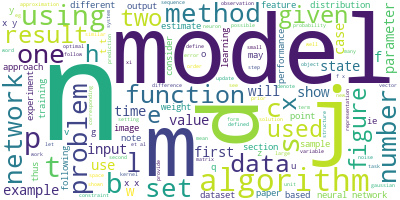

In [9]:
# Import the wordcloud library
from wordcloud import WordCloud

# Join the different processed titles together.
long_string = ','.join(list(papers['paper_text_processed'].values))

# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color='steelblue')

# Generate a word cloud
wordcloud.generate(long_string)

# Visualize the word cloud
wordcloud.to_image()

In [14]:
# Instalar gensim si no está instalado
try:
    import gensim
except ImportError:
    print("Instalando gensim...")
    !pip install gensim

# Instalar nltk si no está instalado
try:
    import nltk
except ImportError:
    print("Instalando nltk...")
    !pip install nltk

# Descargar las stopwords de nltk
import nltk
nltk.download('stopwords')

# Importar stopwords de nltk
from nltk.corpus import stopwords


Instalando gensim...
zsh:1: command not found: pip


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariovelezcanizares/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [18]:
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

def sent_to_words(sentences):
    for sentence in sentences:
        # deacc=True removes punctuations
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) 
             if word not in stop_words] for doc in texts]

data = papers.paper_text_processed.values.tolist()
data_words = list(sent_to_words(data))

# remove stop words
data_words = remove_stopwords(data_words)

print(data_words[:1][0][:30])

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/mariovelezcanizares/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


['probabilistic', 'belief', 'revision', 'structural', 'constraints', 'peter', 'jones', 'mit', 'lincoln', 'laboratory', 'lexington', 'jonep', 'llmitedu', 'venkatesh', 'saligrama', 'dept', 'ece', 'boston', 'university', 'boston', 'srv', 'buedu', 'sanjoy', 'mitter', 'dept', 'eecs', 'mit', 'cambridge', 'mitter', 'mitedu']


In [19]:
import gensim.corpora as corpora

# Create Dictionary
id2word = corpora.Dictionary(data_words)

# Create Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1][0][:30])

[(0, 2), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 2), (7, 2), (8, 1), (9, 1), (10, 1), (11, 2), (12, 1), (13, 1), (14, 1), (15, 2), (16, 10), (17, 1), (18, 3), (19, 1), (20, 1), (21, 1), (22, 3), (23, 1), (24, 1), (25, 2), (26, 1), (27, 1), (28, 1), (29, 1)]


In [20]:
from pprint import pprint

# number of topics
num_topics = 10

# Build LDA model
lda_model = gensim.models.LdaMulticore(corpus=corpus,
                                       id2word=id2word,
                                       num_topics=num_topics)# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.005*"data" + 0.005*"model" + 0.004*"function" + 0.004*"one" + '
  '0.004*"learning" + 0.004*"time" + 0.004*"using" + 0.004*"set" + '
  '0.004*"algorithm" + 0.003*"state"'),
 (1,
  '0.005*"model" + 0.005*"matrix" + 0.004*"algorithm" + 0.004*"data" + '
  '0.004*"learning" + 0.004*"time" + 0.004*"one" + 0.004*"function" + '
  '0.003*"using" + 0.003*"number"'),
 (2,
  '0.005*"data" + 0.005*"model" + 0.004*"learning" + 0.004*"time" + '
  '0.004*"one" + 0.004*"function" + 0.004*"set" + 0.003*"input" + '
  '0.003*"algorithm" + 0.003*"number"'),
 (3,
  '0.007*"learning" + 0.005*"data" + 0.005*"model" + 0.004*"algorithm" + '
  '0.004*"using" + 0.004*"neural" + 0.004*"time" + 0.003*"figure" + '
  '0.003*"one" + 0.003*"models"'),
 (4,
  '0.007*"model" + 0.006*"learning" + 0.005*"data" + 0.005*"set" + '
  '0.004*"problem" + 0.004*"function" + 0.004*"using" + 0.004*"algorithm" + '
  '0.003*"network" + 0.003*"one"'),
 (5,
  '0.006*"model" + 0.005*"learning" + 0.005*"network" + 0.004*"time"

In [25]:
import os
import pyLDAvis.gensim
import pickle 
import pyLDAvis

# Crear la carpeta 'results' si no existe
os.makedirs('./results', exist_ok=True)

# Visualize the topics
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join('./results/ldavis_prepared_' + str(num_topics))

# Preparar la visualización de temas
if 1 == 1:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, 'wb') as f:
        pickle.dump(LDAvis_prepared, f)

# Cargar los datos preparados desde el disco
with open(LDAvis_data_filepath, 'rb') as f:
    LDAvis_prepared = pickle.load(f)

# Guardar la visualización como HTML
pyLDAvis.save_html(LDAvis_prepared, './results/ldavis_prepared_' + str(num_topics) + '.html')

# Mostrar la visualización (solo si estás en Jupyter Notebook)
LDAvis_prepared


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
9     -0.010841  0.002559       1        1  22.543029
8     -0.001471  0.000049       2        1  14.528404
6      0.001702 -0.002076       3        1  13.300379
7     -0.001302  0.001320       4        1  10.828087
3      0.000441  0.000424       5        1   9.226770
4     -0.002939 -0.006348       6        1   8.065166
5      0.006123 -0.007142       7        1   7.361659
1      0.006959  0.008084       8        1   5.886977
2      0.002124  0.001430       9        1   5.262352
0     -0.000795  0.001699      10        1   2.997178, topic_info=          Term         Freq        Total Category  logprob  loglift
501      model  1245.000000  1245.000000  Default  30.0000  30.0000
183       data  1199.000000  1199.000000  Default  29.0000  29.0000
786       time   779.000000   779.000000  Default  28.0000  28.0000
477     matrix   526.000000   526.000000  Default  27.0000  27.0000
823      using   778.000000   778.000000  Default  26.0000  26.0000
...        ...          ...          ...      ...      ...      ...
298     figure    18.266986   731.105983  Topic10  -5.9228  -0.1820
503     models    16.469134   634.981740  Topic10  -6.0265  -0.1446
1507  training    15.592822   615.654357  Topic10  -6.0811  -0.1684
520    network    16.103062   718.117007  Topic10  -6.0489  -0.2901
1253    neural    15.177152   646.428902  Topic10  -6.1082  -0.2442

[863 rows x 6 columns], token_table=       Topic      Freq       Term
term                             
10131      1  0.287961      abide
10131      2  0.287961      abide
10131      8  0.287961      abide
7238       1  0.136930  acoustics
7238       2  0.273861  acoustics
...      ...       ...        ...
1558       6  0.077051       zero
1558       7  0.068490       zero
1558       8  0.068490       zero
1558       9  0.085613       zero
1558      10  0.025684       zero

[3918 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[10, 9, 7, 8, 4, 5, 6, 2, 3, 1])